# Laboratorio 1: Grupo 27

Martín Del Gordo <br>
Raul Insuasty <br>
Nicolás Prada <br>

## 1. Entendimiento de los datos

Vamos a empezar haciendo la importación de nuestras librerías.

In [1]:
%pip install -U ipywidgets jupyterlab
# %pip install -U notebook

import sys
print(sys.executable) 

C:\Users\incar\anaconda3\python.exe



In [2]:
%pip install -U pip setuptools wheel
%pip install numpy pandas matplotlib seaborn scikit-learn scipy joblib ydata-profiling

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7,<3.11; 4.1.0 Requires-Python >=3.7,<3.12; 4.1.1 Requires-Python >=3.7,<3.12; 4.1.2 Requires-Python >=3.7,<3.12; 4.10.0 Requires-Python >=3.7,<3.13; 4.11.0 Requires-Python >=3.7,<3.13; 4.12.0 Requires-Python >=3.7,<3.13; 4.12.1 Requires-Python >=3.7,<3.13; 4.12.2 Requires-Python >=3.7,<3.13; 4.13.0 Requires-Python >=3.7,<3.13; 4.14.0 Requires-Python >=3.7,<3.13; 4.15.0 Requires-Python >=3.7,<3.13; 4.15.1 Requires-Python >=3.7,<3.13; 4.16.0 Requires-Python >=3.7,<3.13; 4.16.1 Requires-Python >=3.7,<3.13; 4.2.0 Requires-Python >=3.7,<3.12; 4.3.0 Requires-Python >=3.7,<3.12; 4.3.1 Requires-Python >=3.7,<3.12; 4.3.2 Requires-Python >=3.7,<3.12; 4.4.0 Requires-Python >=3.7,<3.12; 4.5.0 Requires-Python >=3.7,<3.12; 4.5.1 Requires-Python >=3.7,<3.12; 4.6.0 Requires-Python >=3.7,<3.12; 4.6.1 Requires-Python >=3.7,<3.12; 4.6.2 Requires-Python >=3.7,<3.12; 4.6.3 Requires-Python >=3.7,<3.12; 

In [3]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [5]:
db_location_train = './datos_entrenamiento_laboratorio1(train_data).csv'

In [6]:
jugadores_df = pd.read_csv(db_location_train, sep=';', encoding = "ISO-8859-1")

In [7]:
jugadores_df.shape

(57934, 50)

In [8]:
jugadores_df.columns

Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'Goles',
       'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1',
       'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1',
       'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados',
       'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego',
       'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro',
       'Toques_en_zona_ofensiva', 'Toques_en_area_rival',
       '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate',
       'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon',
       'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas',
       'Centros', 'Duelos_aereos_ganad

Primero eliminamos las columnas duplicadas. Para esto les tenemos que eliminar el número que pandas les coloca por defecto y después aplicarle .duplicated()

In [9]:
jugadores_df = jugadores_df.loc[:, ~jugadores_df.columns.str.replace(r'\.\d+$', '', regex=True).duplicated()]
jugadores_df.columns

Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'Goles',
       'Tiros Totales', 'xG', 'npxG', 'xAG', 'Acciones_que_crean_tiros',
       'Pases_intentados', 'Pases_progresivos', 'Regates_exitosos',
       'Pases_medios_completados', 'Pases_largos_completados', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_fuera_de_juego', 'Valla_no_vencida',
       'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva',
       'Toques_en_area_rival', '%_de_regates_exitosos',
       'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio',
       'Malos_controles', 'Perdida_balon', 'Pases_recibidos',
       'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros',
       'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados', 'market_value',
       'contract_date'],
      dtype='object')

Además nos dimos cuenta que en el diccionario y en nuestros datos "Pases_centros" y "Centros" significaban lo mismo, por lo que eliminamos Pases_centros


In [10]:
#Se quita la columna Pases_Centros.
jugadores_df = jugadores_df.drop(columns=["Pases_centros"])

## 2. Perfilamiento y exploración de datos

In [11]:
jugadores_df.shape

(57934, 40)

In [12]:
jugadores_df.head(5)

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,â¬50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,â¬50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,â¬1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,â¬45.00m,30.06.2028


In [13]:
jugadores_df.dtypes

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_progresivos                   int64
Regates_exitosos                    int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xA                                float64
Pases_en_ultimo_tercio              int64
Pases_balon_vivo                    int64
Pases_balon_muerto                  int64
Pases_al_hueco                      int64
Pases_completados                   int64
Pases_fuera_de_juego                int64
Valla_no_vencida                  

Nos podemos dar cuenta que hay trabajo por hacer para las variables:
 - Jugador (unificar los registros)
 - Nacionalidad (eliminar columna)
 - Posición (Convertir a categórica)
 - Edad (dejar en años)
 - Market Value (corregir el formato)
 - Contract Date (dias para que venza el contrato)

In [14]:
pd.set_option("display.max_rows", None)  
jugadores_df.describe()

,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000
mean,0.513015,0.792402,0.088635,0.080473,0.062784,1.416750,31.659716,2.416232,0.487451,11.226309,2.341941,0.055056,1.976232,28.593900,2.956140,0.096196,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,1.133652,0.834795,48.814187
std,16.440600,1.158538,0.209810,0.186549,0.152033,1.727395,22.963272,2.756341,0.897683,10.984869,2.867533,0.122355,2.583320,21.511297,3.733981,0.342576,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,2.005869,1.305149,39.560765
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,2.000000,0.000000,8.000000,1.000000,0.000000,1.000000,24.000000,1.000000,0.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,50.000000
75%,0.000000,1.000000,0.100000,0.100000,0.100000,2.000000,45.000000,4.000000,1.000000,16.000000,3.000000,0.100000,3.000000,40.000000,4.000000,0.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,1.000000,100.000000
max,995.000000,12.000000,2.900000,2.900000,2.100000,16.000000,171.000000,30.000000,15.000000,95.000000,24.000000,1.400000,37.000000,170.000000,35.000000,8.000000,163.000000,5.000000,21.000000,3.000000,102.000000,25.000000,100.000000,10.000000,16.000000,10.000000,8.000000,159.000000,36.000000,9.000000,25.000000,16.000000,100.000000


Nos llamó la atención lo siguiente:
- Goles: Tanto el mínimo como el máximo son valores que no tienen sentido
- npxG: Las métricas son muy parecidas a las de xG; puede haber alta correlación.

In [15]:
pd.reset_option("display.max_rows")

## 3. Limpieza de los datos

In [16]:
jugadores_df.shape

(57934, 40)

In [17]:
jugadores_df.dtypes

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_progresivos                   int64
Regates_exitosos                    int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xA                                float64
Pases_en_ultimo_tercio              int64
Pases_balon_vivo                    int64
Pases_balon_muerto                  int64
Pases_al_hueco                      int64
Pases_completados                   int64
Pases_fuera_de_juego                int64
Valla_no_vencida                  

In [18]:
jugadores_df.head(5)

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,â¬50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,â¬50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,â¬1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,â¬45.00m,30.06.2028


-
**Se elimina la columna nacionalidad**

In [19]:
jugadores_df = jugadores_df.drop(columns=["Nacionalidad"])

In [20]:
jugadores_df.sample(5)

,Jugador,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
12443,Eric Bailly,CB,30-129,"Monday August 19, 2024",0,0,0.0,0.0,0.0,0,55,2,2,24,5,0.0,5,49,6,0,50,0,4,0,2,0,100.0,0,2,0,0,40,0,0,0,0,0.0,â¬2.00m,30.06.2027
32577,Tammy Abraham,FW,27-129,"Saturday February 8, 2025",0,0,0.0,0.0,0.0,0,10,1,0,4,0,0.0,1,10,0,0,7,0,0,0,6,2,NaN,0,0,3,0,10,3,0,0,1,50.0,NaN,NaN
51870,Amadou Kone,CM,19-235,"Saturday January 4, 2025",0,0,0.0,0.0,0.0,1,32,5,1,14,3,0.0,2,32,0,1,30,0,0,0,9,0,100.0,0,1,2,0,27,1,0,0,1,50.0,NaN,NaN
43477,Ayyoub Bouaddi,"CM,RW",17-129,"Saturday February 8, 2025",0,0,0.0,0.0,0.0,0,18,4,0,10,3,0.0,3,17,1,0,18,0,0,1,8,0,NaN,0,0,2,0,15,0,1,0,0,NaN,â¬28.00m,30.06.2027
39452,Alidu Seidu,CB,24-123,"Saturday October 5, 2024",0,0,0.0,0.0,0.1,3,63,7,1,23,6,0.1,7,56,6,0,52,1,2,0,10,1,50.0,1,1,1,2,42,2,1,0,0,0.0,â¬9.00m,30.06.2029


**Convertimos la edad a un entero**

A cada jugador le decidimos asignar la edad de su último registro encontrado. De esta forma, contamos con la información más reciente de cada uno. Además, si un jugador tiene el registro de edad vacío, se le puede inputar el valor de Edad de su último registro.

In [21]:
# Extraer siempre el número antes del guion como texto
jugadores_df["Edad_num"] = jugadores_df["Edad"].astype(str).str.split("-").str[0]

# Convertir a número
jugadores_df["Edad_num"] = pd.to_numeric(jugadores_df["Edad_num"], errors="coerce")

# Tomar la última edad registrada por jugador
ultima_edad = jugadores_df.groupby("Jugador")["Edad_num"].last()

# Rellenar con la media del jugador si hay NaN
promedio_edad = jugadores_df.groupby("Jugador")["Edad_num"].mean()
ultima_edad = ultima_edad.fillna(promedio_edad)

# Si aún quedan NaN, usar la media global
edad_global = int(jugadores_df["Edad_num"].mean())
ultima_edad = ultima_edad.fillna(edad_global)

# Convertir a int
ultima_edad = ultima_edad.astype(int)

# Mapear de nuevo al DataFrame en la columna final "Edad"
jugadores_df["Edad"] = jugadores_df["Jugador"].map(ultima_edad)

# Opcional: borrar la columna auxiliar
jugadores_df.drop(columns=["Edad_num"], inplace=True)

**Corregir la categórica posición**

In [22]:
jugadores_df['Posicion'].value_counts()

Posicion
CB          9537
FW          6858
CM          5763
GK          3987
DM          3729
            ... 
CM,DM,LW       1
WB,LB,LM       1
LW,WB,LM       1
FW,WB,RM       1
CM,LB,WB       1
Name: count, Length: 452, dtype: int64

In [23]:
#Asegurar que no haya espacios extra
jugadores_df['Posicion'] = jugadores_df['Posicion'].replace(" ", "")

#Crear variables binarias para cada posición
pos_dummies = jugadores_df['Posicion'].str.get_dummies(sep=',')

#Concatenar con el dataframe original
jugadores_df = pd.concat([jugadores_df.drop(columns=['Posicion']), pos_dummies], axis=1)

In [24]:
jugadores_df.head(5)

,Jugador,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB
0,Bruno Fernandes,29,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,1,14,4,0.0,4,51,8,0,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,â¬50.00m,30.06.2027,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Marcus Rashford,26,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,0,2,1,0.1,2,30,0,0,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,â¬50.00m,30.06.2026,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Amad Diallo,22,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Amad Diallo,22,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,6,1,0.1,1,28,4,0,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,â¬1000.00m,30.06.2030,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Alejandro Garnacho,20,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,3,0,0.1,0,11,0,0,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,â¬45.00m,30.06.2028,0,0,0,0,0,0,0,0,0,0,0,1,0


**Limpiar goles sin sentido**

In [25]:
jugadores_df['Goles'].value_counts()

Goles
 0      53205
 1       4226
 2        373
 3         78
 4          3
 663        3
-5          2
 273        1
 807        1
 403        1
 485        1
 505        1
 871        1
 227        1
 361        1
 166        1
 509        1
 689        1
 528        1
 121        1
 156        1
 557        1
 594        1
 484        1
 507        1
 795        1
 995        1
 862        1
 910        1
 341        1
 590        1
 838        1
 861        1
 217        1
 306        1
 352        1
 169        1
 353        1
 142        1
 395        1
 792        1
 955        1
 887        1
 476        1
 632        1
 446        1
 537        1
 150        1
 633        1
 445        1
 202        1
Name: count, dtype: int64

In [26]:
# Filtrar por rango lógico
jugadores_df = jugadores_df[(jugadores_df['Goles']>=0) & (jugadores_df['Goles'] <= 7)]

In [27]:
jugadores_df['Goles'].value_counts()

Goles
0    53205
1     4226
2      373
3       78
4        3
Name: count, dtype: int64

Ahora la cantidad de goles tiene mucho más sentido

**Correccion del precio**

In [28]:
jugadores_df['market_value'].value_counts()

market_value
â¬5.00m      2332
â¬6.00m      2138
â¬15.00m     2058
â¬20.00m     1989
â¬10.00m     1976
              ... 
â¬50k          12
â¬110.00m       6
â¬450k          3
â¬550k          2
â¬650k          2
Name: count, Length: 94, dtype: int64

In [29]:
import numpy as np
import re
import pandas as pd

def parse_market_value(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).lower().strip()
    
    # Casos vacíos o con guiones
    if value in ['-', '', 'nan', 'none', 'error']:
        return np.nan
    
    # Quitar símbolos de moneda raros
    value = re.sub(r'[^0-9\.mk]', '', value) 
    
    try:
        if value.endswith('m'):
            return float(value[:-1]) * 1e6
        elif value.endswith('k'):
            return float(value[:-1]) * 1e3
        else:
            return float(value)
    except:
        return np.nan

# Aplicar parsing
jugadores_df['market_value'] = jugadores_df['market_value'].apply(parse_market_value)

# Rellenar los NaN con la moda por jugador
def fill_with_mode(group):
    moda = group['market_value'].mode()
    if len(moda) > 0:
        group['market_value'] = group['market_value'].fillna(moda[0])
    return group

jugadores_df = jugadores_df.groupby("Jugador").apply(fill_with_mode).reset_index(drop=True)

C:\Users\incar\AppData\Local\Temp\ipykernel_3216\82561516.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  jugadores_df = jugadores_df.groupby("Jugador").apply(fill_with_mode).reset_index(drop=True)


In [30]:
jugadores_df["market_value"].describe()

count    4.532300e+04
mean     1.028434e+08
std      9.199441e+08
min      5.000000e+04
25%      4.000000e+06
50%      1.000000e+07
75%      2.500000e+07
max      9.999990e+09
Name: market_value, dtype: float64

El valor máximo llega a ser de 9 mil millones, cosa que es imposible. Entonces, usamos value counts para detectar el valor máximo viable.

In [31]:
jugadores_df["market_value"].value_counts()

market_value
5000000.0      2392
6000000.0      2139
15000000.0     2059
20000000.0     1992
10000000.0     1976
               ... 
50000.0          12
110000000.0       6
450000.0          3
550000.0          2
650000.0          2
Name: count, Length: 92, dtype: int64

El máximo (eliminando 9 mil millones) es 200 millones. Entonces, quitamos los registros cuyo market value superen dicho numero

In [32]:
jugadores_df = jugadores_df[jugadores_df["market_value"] <= 200000000]

In [33]:
jugadores_df["market_value"].describe()

count    4.493500e+04
mean     1.738455e+07
std      2.200086e+07
min      5.000000e+04
25%      3.500000e+06
50%      1.000000e+07
75%      2.400000e+07
max      2.000000e+08
Name: market_value, dtype: float64

**Corregir la fecha de fin de contrato a numeros**

Si un jugador no tiene fecha de contrato, se toma la moda de ese mismo jugador para inputar el valor. Entonces, se transforma esta columna para representar la cantidad de años que le restan de contrato, en formato decimal.

In [34]:
# Convertir a datetime
jugadores_df['contract_date'] = pd.to_datetime(
    jugadores_df['contract_date'], format="%d.%m.%Y", errors='coerce'
)

# Reemplazar NaT con la moda de cada jugador
def fill_contract_mode(grupo):
    # Si todas son NaT, se deja como NaT
    if grupo.dropna().empty:
        return grupo
    # Moda (puede devolver varios, tomamos el primero)
    moda = grupo.mode().iloc[0]
    return grupo.fillna(moda)

jugadores_df['contract_date'] = (
    jugadores_df.groupby('Jugador')['contract_date']
    .transform(fill_contract_mode)
)

# Calcular años restantes desde hoy
today = pd.Timestamp.today()
jugadores_df['contract_years_left'] = (jugadores_df['contract_date'] - today).dt.days / 365

# Eliminar columna original
jugadores_df = jugadores_df.drop(columns=['contract_date'])

print(jugadores_df[['contract_years_left']].head())

    contract_years_left
0              0.827397
22             0.827397
23             0.827397
24             0.827397
25             0.827397


In [35]:
jugadores_df.head(5)

,Jugador,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB,contract_years_left
0,Aaron Ciammaglichella,19,"Sunday August 25, 2024",0,0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,NaN,700000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.827397
22,Aaron Martin,28,"Saturday August 17, 2024",0,0,0.0,0.0,0.0,2,32,1,1,10,1,0.0,1,18,14,0,20,0,1,1,13,0,50.0,0,1,1,0,17,3,1,6,0,0.0,6500000.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.827397
23,Aaron Martin,28,"Saturday August 24, 2024",0,1,0.0,0.0,0.0,4,40,5,0,12,2,0.1,4,26,14,0,26,0,3,0,16,1,NaN,0,3,0,1,19,3,2,8,1,100.0,6500000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.827397
24,Aaron Martin,28,"Sunday September 1, 2024",0,0,0.0,0.0,0.1,2,55,5,0,19,6,0.6,6,39,16,0,39,0,3,0,18,1,0.0,1,0,0,0,35,4,1,12,1,50.0,6500000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.827397
25,Aaron Martin,28,"Sunday September 15, 2024",0,1,0.0,0.0,0.3,9,56,6,0,8,6,0.7,5,45,11,0,38,0,2,0,28,0,NaN,0,1,1,1,38,6,0,14,2,100.0,6500000.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.827397


### Eliminacion de nulos

Empezaremos con la eliminación de los valores nulos

In [36]:
jugadores_df.isnull().sum()

Jugador                               0
Edad                                  0
Dia_partido                           0
Goles                                 0
Tiros Totales                         0
xG                                    0
npxG                                  0
xAG                                   0
Acciones_que_crean_tiros              0
Pases_intentados                      0
Pases_progresivos                     0
Regates_exitosos                      0
Pases_medios_completados              0
Pases_largos_completados              0
xA                                    0
Pases_en_ultimo_tercio                0
Pases_balon_vivo                      0
Pases_balon_muerto                    0
Pases_al_hueco                        0
Pases_completados                     0
Pases_fuera_de_juego                  0
Valla_no_vencida                      0
Errores_defnsivos_ocasion_tiro        0
Toques_en_zona_ofensiva               0
Toques_en_area_rival                  0


In [37]:
jugadores_df.isnull().mean() * 100

Jugador                            0.000000
Edad                               0.000000
Dia_partido                        0.000000
Goles                              0.000000
Tiros Totales                      0.000000
xG                                 0.000000
npxG                               0.000000
xAG                                0.000000
Acciones_que_crean_tiros           0.000000
Pases_intentados                   0.000000
Pases_progresivos                  0.000000
Regates_exitosos                   0.000000
Pases_medios_completados           0.000000
Pases_largos_completados           0.000000
xA                                 0.000000
Pases_en_ultimo_tercio             0.000000
Pases_balon_vivo                   0.000000
Pases_balon_muerto                 0.000000
Pases_al_hueco                     0.000000
Pases_completados                  0.000000
Pases_fuera_de_juego               0.000000
Valla_no_vencida                   0.000000
Errores_defnsivos_ocasion_tiro  

In [38]:
jugadores_df.shape

(44935, 51)

Se quitan las columnas % de regates exitosos y % de duelos aereos ganados porque tienen más de 20,000 nulos

In [39]:
jugadores_df = jugadores_df.drop(columns=['%_de_regates_exitosos', '%_de_duelos_aereos_ganados'])

Se eliminan los jugadores sin contract_years_left.

In [40]:
jugadores_df = jugadores_df.dropna(subset=['contract_years_left'])

In [41]:
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
jugadores_df.isnull().sum()

Jugador                           0
Edad                              0
Dia_partido                       0
Goles                             0
Tiros Totales                     0
xG                                0
npxG                              0
xAG                               0
Acciones_que_crean_tiros          0
Pases_intentados                  0
Pases_progresivos                 0
Regates_exitosos                  0
Pases_medios_completados          0
Pases_largos_completados          0
xA                                0
Pases_en_ultimo_tercio            0
Pases_balon_vivo                  0
Pases_balon_muerto                0
Pases_al_hueco                    0
Pases_completados                 0
Pases_fuera_de_juego              0
Valla_no_vencida                  0
Errores_defnsivos_ocasion_tiro    0
Toques_en_zona_ofensiva           0
Toques_en_area_rival              0
Veces_que_fue_barrido_regate      0
Acarreos_ultimo_tercio            0
Malos_controles             

Como se observa, ya no hay elementos nulos.

In [42]:
jugadores_df.shape

(44302, 49)

**Unificar registros de jugadores**

In [43]:
# Limpiar espacios, pasar a mayúsculas y quitar caracteres raros
jugadores_df['Jugador'] = (
    jugadores_df['Jugador']
    .str.strip()
    .str.upper()
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
)

In [44]:
jugadores_df.shape

(44302, 49)

Ahora, eliminamos los jugadores que tengan 2 registros de dia_partido igual, pues estos son registros duplicados.

In [45]:
jugadores_df = jugadores_df.drop_duplicates(subset=['Jugador', 'Dia_partido'], keep='first')

In [46]:
jugadores_df.shape

(34055, 49)

In [47]:
# número de jugadores únicos
print(jugadores_df['Jugador'].nunique())  
# número de filas antes de agrupar
print(jugadores_df.shape[0])              

1504
34055


Unificamos los registros de cada jugador sumando las cantidades. Para columnas que se mantienen constantes como la edad o valor de mercado, tomamos el primer valor que se encuentre. Para la posición (que es variable dummy), tomamos el máximo (que será 1 o 0). Además, añadimos una columna que se llame num_partidos y represente la cantidad de partidos que jugo un jugador. Consideramos que un jugador con pocas lesiones es más valioso para un club.

In [48]:
sum_cols = [
    'Goles','Tiros Totales','Acciones_que_crean_tiros','Pases_intentados',
    'Pases_progresivos','Regates_exitosos','Pases_medios_completados',
    'Pases_largos_completados','Pases_en_ultimo_tercio','Pases_balon_vivo',
    'Pases_balon_muerto','Pases_al_hueco','Pases_completados',
    'Pases_fuera_de_juego','Valla_no_vencida','Errores_defnsivos_ocasion_tiro',
    'Toques_en_zona_ofensiva','Toques_en_area_rival','Veces_que_fue_barrido_regate',
    'Acarreos_ultimo_tercio','Malos_controles','Perdida_balon','Pases_recibidos',
    'Pases_progresivos_recibidos','Faltas_cometidas','Centros',
    'Duelos_aereos_ganados'
]

mean_cols = ['xG','npxG','xAG','xA']

static_cols = ['Edad','market_value','contract_years_left']

# Detectar automáticamente las columnas dummy (posiciones)
dummy_cols = [c for c in jugadores_df.columns 
              if c not in (['Jugador'] + sum_cols + mean_cols + static_cols)]

# Crear diccionario de agregaciones
agg_dict = {col: 'sum' for col in sum_cols}
agg_dict.update({col: 'sum' for col in mean_cols}) 
agg_dict.update({col: 'first' for col in static_cols})
agg_dict.update({col: 'max' for col in dummy_cols})

# Añadir el conteo de partidos
agg_dict['Dia_partido'] = 'count'

# Hacer la agregación
jugadores_final = jugadores_df.groupby('Jugador').agg(agg_dict).reset_index()

# Renombrar la nueva columna
jugadores_final = jugadores_final.rename(columns={'Dia_partido': 'num_partidos'})

print(jugadores_final.shape)
print(jugadores_final[['Jugador', 'num_partidos']].head())


(1504, 49)
                 Jugador  num_partidos
0  AARON CIAMMAGLICHELLA             1
1           AARON MARTIN            36
2         AARON RAMSDALE            30
3       AARON WANBISSAKA            36
4           ABAKAR SYLLA            21


In [49]:
jugadores_df.head(5)

,Jugador,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,market_value,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB,contract_years_left
0,AARON CIAMMAGLICHELLA,19,"Sunday August 25, 2024",0,0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.827397
22,AARON MARTIN,28,"Saturday August 17, 2024",0,0,0.0,0.0,0.0,2,32,1,1,10,1,0.0,1,18,14,0,20,0,1,1,13,0,0,1,1,0,17,3,1,6,0,6500000.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.827397
23,AARON MARTIN,28,"Saturday August 24, 2024",0,1,0.0,0.0,0.0,4,40,5,0,12,2,0.1,4,26,14,0,26,0,3,0,16,1,0,3,0,1,19,3,2,8,1,6500000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.827397
24,AARON MARTIN,28,"Sunday September 1, 2024",0,0,0.0,0.0,0.1,2,55,5,0,19,6,0.6,6,39,16,0,39,0,3,0,18,1,1,0,0,0,35,4,1,12,1,6500000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.827397
25,AARON MARTIN,28,"Sunday September 15, 2024",0,1,0.0,0.0,0.3,9,56,6,0,8,6,0.7,5,45,11,0,38,0,2,0,28,0,0,1,1,1,38,6,0,14,2,6500000.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.827397


In [50]:
print(jugadores_df.shape)
print(jugadores_final.shape)

(34055, 49)
(1504, 49)


In [51]:
jugadores_final = jugadores_final.drop(columns=["Jugador"])

In [52]:
jugadores_final.head(5)

,Goles,Tiros Totales,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,xG,npxG,xAG,xA,Edad,market_value,contract_years_left,num_partidos,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,19,700000.0,0.827397,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,16,95,1685,90,12,557,160,77,1226,454,0,1221,5,73,1,608,20,12,31,22,17,1039,108,38,256,20,0.6,0.6,5.4,5.8,28,6500000.0,0.827397,36,0,0,1,0,0,0,1,1,1,0,0,0,1
2,0,0,3,1223,0,0,302,257,36,918,298,0,774,7,10,3,0,0,0,0,3,0,702,0,1,0,6,0.0,0.0,0.0,0.0,27,16000000.0,0.827397,30,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2,16,93,1815,149,64,449,48,94,1568,243,5,1472,4,125,0,637,48,43,65,35,22,1322,167,25,76,22,0.9,0.9,3.4,2.3,26,24000000.0,5.830137,36,0,0,0,0,0,0,1,0,1,1,1,1,1
4,1,5,4,658,21,3,332,22,21,589,69,0,583,0,63,0,26,9,3,1,5,4,497,3,17,1,20,0.5,0.5,0.1,0.0,22,10000000.0,2.830137,21,0,1,1,1,0,0,1,0,0,0,1,0,1


## Regresion

In [53]:
regression = LinearRegression()

In [54]:
# y = variable objetivo
y_train = jugadores_final['market_value']

# X = todas las demás columnas (features)
x_train = jugadores_final.drop(columns=['market_value'])

In [55]:
regression.fit(x_train, y_train)

LinearRegression()

In [56]:
# Extraer coeficientes
coef_df = pd.DataFrame({
    'feature': x_train.columns,
    'coef': regression.coef_
})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print(coef_df.head(200))

                           feature          coef      abs_coef
46                              WB -2.995991e+06  2.995991e+06
34                              AM -2.755607e+06  2.755607e+06
32             contract_years_left  2.550715e+06  2.550715e+06
27                              xG -2.355433e+06  2.355433e+06
28                            npxG  2.133543e+06  2.133543e+06
42                              LW -2.127909e+06  2.127909e+06
29                             xAG  1.704328e+06  1.704328e+06
45                              RW -1.623068e+06  1.623068e+06
37                              DM -1.375102e+06  1.375102e+06
0                            Goles  9.888947e+05  9.888947e+05
39                              GK  9.727198e+05  9.727198e+05
15  Errores_defnsivos_ocasion_tiro  8.289577e+05  8.289577e+05
31                            Edad -7.553067e+05  7.553067e+05
44                              RM -6.793791e+05  6.793791e+05
30                              xA  5.677741e+05  5.677

**Problemas encontrados**:
- Los coeficientes no estan en la misma escala (StandardScaler)
- Es posible que haya multicolinealidad

In [57]:
x_train.head(5)

,Goles,Tiros Totales,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,xG,npxG,xAG,xA,Edad,contract_years_left,num_partidos,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,19,0.827397,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,16,95,1685,90,12,557,160,77,1226,454,0,1221,5,73,1,608,20,12,31,22,17,1039,108,38,256,20,0.6,0.6,5.4,5.8,28,0.827397,36,0,0,1,0,0,0,1,1,1,0,0,0,1
2,0,0,3,1223,0,0,302,257,36,918,298,0,774,7,10,3,0,0,0,0,3,0,702,0,1,0,6,0.0,0.0,0.0,0.0,27,0.827397,30,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2,16,93,1815,149,64,449,48,94,1568,243,5,1472,4,125,0,637,48,43,65,35,22,1322,167,25,76,22,0.9,0.9,3.4,2.3,26,5.830137,36,0,0,0,0,0,0,1,0,1,1,1,1,1
4,1,5,4,658,21,3,332,22,21,589,69,0,583,0,63,0,26,9,3,1,5,4,497,3,17,1,20,0.5,0.5,0.1,0.0,22,2.830137,21,0,1,1,1,0,0,1,0,0,0,1,0,1


In [58]:
import numpy as np

corr = x_train.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if (upper[col] > 0.90).any()]

x_reduced = x_train.drop(columns=to_drop)
print(f"Quitadas por alta correlación: {len(to_drop)} columnas")

Quitadas por alta correlación: 12 columnas


In [59]:
print(to_drop)

['Pases_medios_completados', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_completados', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', 'Veces_que_fue_barrido_regate', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'xG', 'npxG', 'xA']


In [60]:
x_reduced.head(5)

,Goles,Tiros Totales,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_largos_completados,Pases_balon_muerto,Pases_al_hueco,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Faltas_cometidas,Centros,Duelos_aereos_ganados,xAG,Edad,contract_years_left,num_partidos,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,19,0.827397,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,16,95,1685,90,12,160,454,0,5,73,1,31,22,17,38,256,20,5.4,28,0.827397,36,0,0,1,0,0,0,1,1,1,0,0,0,1
2,0,0,3,1223,0,0,257,298,0,7,10,3,0,3,0,1,0,6,0.0,27,0.827397,30,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2,16,93,1815,149,64,48,243,5,4,125,0,65,35,22,25,76,22,3.4,26,5.830137,36,0,0,0,0,0,0,1,0,1,1,1,1,1
4,1,5,4,658,21,3,22,69,0,0,63,0,1,5,4,17,1,20,0.1,22,2.830137,21,0,1,1,1,0,0,1,0,0,0,1,0,1


In [61]:
# Definir variables predictoras y target
X = x_reduced          
y = jugadores_final['market_value'] 

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1203, 35) (301, 35) (1203,) (301,)


In [62]:
# 1) Estandarizar (fit SOLO en train, transform en train y test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [63]:
# 2) Entrenar modelo lineal
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [64]:
# Guardar los nombres ANTES de escalar
feature_cols = x_reduced.columns.tolist()

# Construir la tabla de coeficientes
import pandas as pd
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coef': regression.coef_.ravel()
})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print(coef_df.head(200))

                           feature          coef      abs_coef
3                 Pases_intentados  1.014425e+07  1.014425e+07
13                 Malos_controles -7.126763e+06  7.126763e+06
2         Acciones_que_crean_tiros  6.923696e+06  6.923696e+06
18                             xAG  5.929570e+06  5.929570e+06
16                         Centros -5.232530e+06  5.232530e+06
1                    Tiros Totales  5.180650e+06  5.180650e+06
5                 Regates_exitosos  3.631833e+06  3.631833e+06
0                            Goles  3.353567e+06  3.353567e+06
4                Pases_progresivos -3.346890e+06  3.346890e+06
20             contract_years_left  3.317805e+06  3.317805e+06
19                            Edad -3.298257e+06  3.298257e+06
10                Valla_no_vencida -2.546748e+06  2.546748e+06
22                              AM -1.836827e+06  1.836827e+06
6         Pases_largos_completados -1.805050e+06  1.805050e+06
34                              WB -1.712612e+06  1.712

### Evaluación del desempeño del modelo

Para complementar las métricas numéricas (MAE, RMSE y R²), es necesario realizar un análisis visual que nos permita identificar cómo se comporta el modelo en sus predicciones.  
Este tipo de gráficos ayudan a validar si el modelo tiene sesgos sistemáticos, si se ajusta adecuadamente a los datos y en qué rangos de valores falla más.

A continuación, evaluamos el modelo con:
- Gráfico de valores observados vs. valores predichos.
- Distribución de los errores absolutos.
- Curva de residuales acumulados.

MAE  = 8,885,931.99
RMSE = 12,395,402.21
R²   = 0.4727


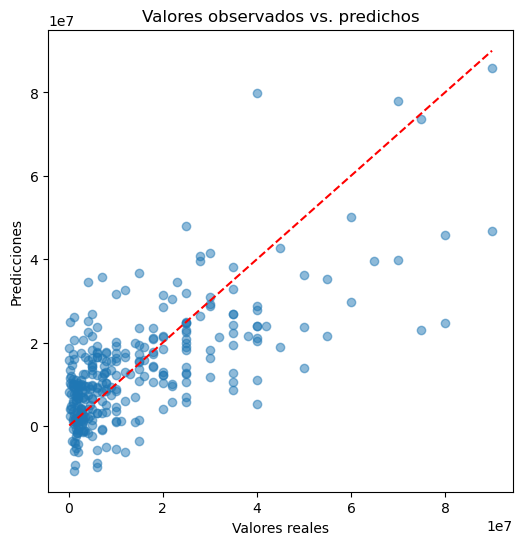

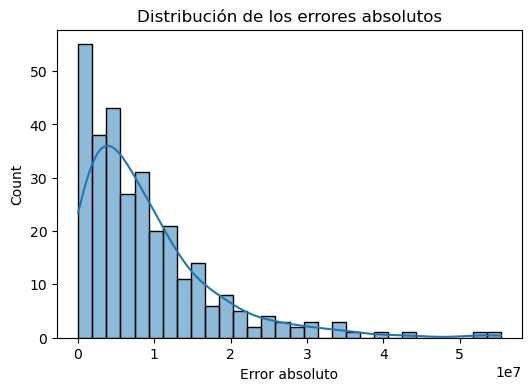

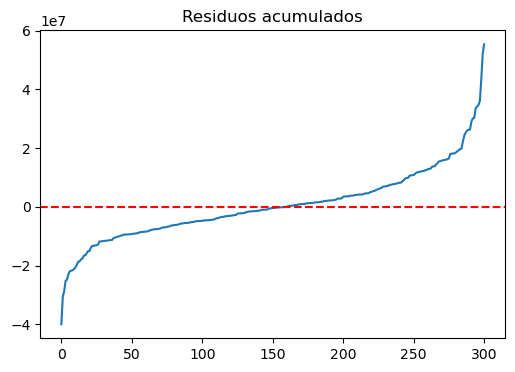

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones en test
y_pred = regression.predict(X_test_scaled)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ← aquí está la diferencia
r2 = r2_score(y_test, y_pred)

print(f"MAE  = {mae:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R²   = {r2:.4f}")

# ---- Gráfico 1: Observados vs. Predichos ----
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea perfecta
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores observados vs. predichos")
plt.show()

# ---- Gráfico 2: Distribución de errores absolutos ----
errors = np.abs(y_test - y_pred)

plt.figure(figsize=(6,4))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error absoluto")
plt.title("Distribución de los errores absolutos")
plt.show()

# ---- Gráfico 3: Residuos acumulados ----
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.plot(np.sort(residuals))
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuos acumulados")
plt.show()

### Análisis de las gráficas de desempeño del modelo

- **Valores observados vs. predichos:** La nube de puntos muestra cierta capacidad predictiva, pero con gran dispersión. El modelo tiende a subestimar jugadores de alto valor y a sobreestimar en algunos casos extremos.  

- **Distribución de los errores absolutos:** La mayoría de errores son relativamente bajos, aunque existe una cola larga hacia la derecha que evidencia predicciones muy alejadas de la realidad para algunos jugadores top del mercado.  

- **Residuos acumulados:** La curva no se centra de manera simétrica alrededor de 0. Se observa un sesgo: el modelo subestima valores en gran parte de los casos y sobreestima en los extremos.  

**Conclusión:** El modelo es aceptable para jugadores de valores intermedios, pero falla en los extremos. Esto sugiere considerar transformaciones en la variable objetivo, manejo de outliers o modelos más robustos para mejorar la estabilidad de las predicciones.


### Validación de la homocedasticidad

Otro de los supuestos fundamentales en un modelo de regresión lineal es la **homocedasticidad**.  
Este principio establece que la varianza de los errores debe permanecer constante a lo largo de todos los valores de las predicciones.  

Si este supuesto no se cumple (heterocedasticidad), se generan varios problemas:
- Los errores se amplían o se reducen sistemáticamente en función del valor predicho.
- Los intervalos de confianza y pruebas de significancia de los coeficientes dejan de ser confiables.
- El modelo puede ser poco robusto al predecir para valores extremos de la variable objetivo.

Para evaluar este supuesto, se utiliza el **gráfico de residuos vs. predicciones**.  
En este gráfico esperamos que los residuos se distribuyan aleatoriamente alrededor de cero, con una dispersión relativamente constante a lo largo de todo el rango de predicciones. 
Patrones en forma de abanico, curvaturas o concentraciones anómalas de puntos indican que la homocedasticidad no se cumple.

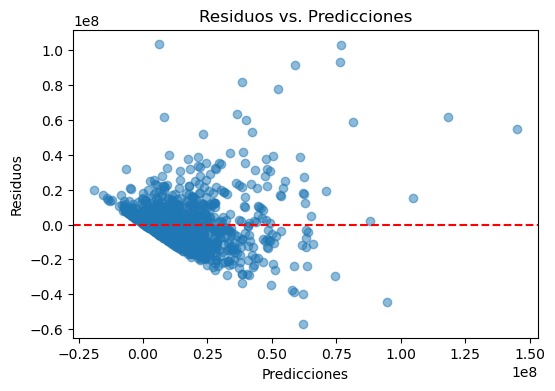

In [66]:
%matplotlib inline


# Predicciones en train
y_train_pred = regression.predict(X_train_scaled)

# Residuos
residuals = y_train - y_train_pred

# Gráfico residuos vs. predicciones
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.show()


#### Análisis de homocedasticidad

En la gráfica de residuos vs. predicciones se observa que los residuos no están distribuidos de forma aleatoria alrededor de la línea cero. 
En lugar de ello, presentan un patrón en forma de abanico: para valores bajos de las predicciones los errores son pequeños, mientras que para valores altos los errores se dispersan mucho más. 

Esto indica que **no se cumple el supuesto de homocedasticidad**, es decir, la varianza de los errores no es constante. 
La consecuencia de esta violación es que, aunque los coeficientes del modelo sigan siendo insesgados, las inferencias estadísticas (intervalos de confianza, pruebas de significancia) pueden no ser válidas. 
Además, el modelo parece menos confiable en la predicción de jugadores con valores de mercado muy altos, posiblemente por la presencia de outliers.

### Verificación de la normalidad de los residuos

Uno de los supuestos fundamentales en regresión lineal es que los **residuos** (errores de predicción) sigan una distribución aproximadamente normal con media cero.  

- Esto permite aplicar inferencia estadística confiable (p-values, intervalos de confianza, etc.).  
- Para revisarlo, se utilizan tanto **gráficos** (histograma y QQ-plot) como **pruebas estadísticas** (Shapiro-Wilk).  
- Si los residuos no son normales, puede ser necesario aplicar transformaciones a la variable objetivo o a algunas variables explicativas.


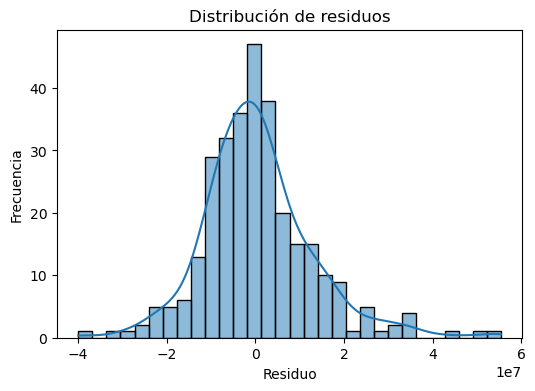

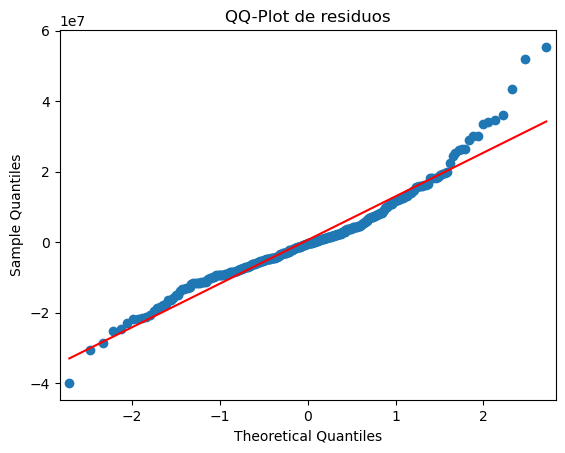

Shapiro-Wilk test: estadístico=0.9505, p-valor=0.0000
Se rechaza H0: los residuos NO siguen una distribución normal.


In [67]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

residuos = y_test - y_pred

# Histograma + KDE
plt.figure(figsize=(6,4))
sns.histplot(residuos, kde=True, bins=30)
plt.title("Distribución de residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

# QQ-plot
import statsmodels.api as sm
sm.qqplot(residuos, line='s')
plt.title("QQ-Plot de residuos")
plt.show()

# Prueba estadística de normalidad (Shapiro-Wilk)
stat, p_value = stats.shapiro(residuos)
print(f"Shapiro-Wilk test: estadístico={stat:.4f}, p-valor={p_value:.4f}")
if p_value > 0.05:
    print("No se rechaza H0: los residuos siguen una distribución normal (aprox).")
else:
    print("Se rechaza H0: los residuos NO siguen una distribución normal.")


### Análisis de la normalidad de los residuos

- **Histograma:** Los residuos están centrados en 0 pero presentan colas largas y cierta asimetría.  
- **QQ-Plot:** En la parte central los puntos siguen la diagonal, pero en los extremos se desvían de forma marcada, indicando colas más pesadas que una normal.  
- **Prueba Shapiro-Wilk:** Estadístico = 0.9505, p-valor < 0.05 → se rechaza la hipótesis nula.  

**Conclusión:** Los residuos **no siguen una distribución normal**.  
Esto implica que la inferencia estadística del modelo (intervalos de confianza y significancia de coeficientes) puede no ser totalmente confiable.  

**Acciones recomendadas:** considerar transformaciones en la variable objetivo, revisar la presencia de outliers y evaluar modelos más robustos que no dependan estrictamente de este supuesto.


### Evaluación de la multicolinealidad con VIF

La multicolinealidad ocurre cuando las variables explicativas están fuertemente correlacionadas entre sí, lo cual afecta la **estabilidad y la interpretación de los coeficientes** de la regresión.  

- Si existe multicolinealidad alta, los errores estándar de los coeficientes aumentan y se vuelve difícil determinar la importancia real de cada variable.  
- Para evaluarlo se utiliza el **Variance Inflation Factor (VIF)**:  
  - VIF ≈ 1: baja correlación.  
  - VIF entre 1 y 5: aceptable.  
  - VIF > 5 (o > 10): multicolinealidad preocupante.  

En este análisis, calcularemos el VIF después del preprocesamiento aplicado en el pipeline, de manera que refleje las transformaciones efectivamente usadas en el modelo.

In [68]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X_train debe ser DataFrame; si es array, conviértelo a DF con nombres genéricos:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=[f"x{i}" for i in range(np.asarray(X_train).shape[1])])

Xv = X_train.copy()

# Si aún no has hecho dummies y tienes categóricas, puedes hacerlas ahora:
cat_cols = Xv.select_dtypes(exclude='number').columns.tolist()
if cat_cols:
    Xv = pd.get_dummies(Xv, columns=cat_cols, drop_first=True)

# Quita columnas de varianza casi cero
variances = Xv.var(numeric_only=True)
Xv = Xv.loc[:, variances > 1e-12]

vif = pd.DataFrame({
    "Variable": Xv.columns,
    "VIF": [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
}).sort_values("VIF", ascending=False)

vif.head(25)


,Variable,VIF
3,Pases_intentados,45.576457
2,Acciones_que_crean_tiros,44.680073
21,num_partidos,36.499947
4,Pases_progresivos,28.701598
13,Malos_controles,17.678315
1,Tiros Totales,15.707635
12,Acarreos_ultimo_tercio,13.514654
18,xAG,12.103481
14,Perdida_balon,12.082875
6,Pases_largos_completados,10.079677


### Análisis de multicolinealidad (VIF)

Los resultados muestran que varias variables tienen **VIF muy elevados**:

- **Pases_intentados (≈45), Acciones_que_crean_tiros (≈45), num_partidos (≈36), Pases_progresivos (≈28)**  
  → Estas variables presentan multicolinealidad fuerte.  

- Otras variables como **Malos_controles, Tiros_totales, xAG, Perdida_balon, Pases_largos_completados** muestran VIF entre 10–18, también altos.  

- En cambio, la mayoría de variables a partir de la mitad de la tabla tienen VIF menores a 5, lo cual es aceptable.

**Conclusión:**  
El modelo presenta **multicolinealidad significativa** entre ciertas variables de pases y volumen de juego. Esto implica que sus coeficientes pueden ser inestables y difíciles de interpretar desde un punto de vista estadístico.

**Acciones posibles:**  
1. Usar `drop='first'` en el *OneHotEncoder* para reducir colinealidad entre variables categóricas.  
2. Eliminar o combinar predictores altamente correlacionados (ej. quedarse con uno de los indicadores de pases en lugar de todos).  
3. Emplear modelos con **regularización** (Ridge o Lasso) si el objetivo es mejorar la predicción más que la inferencia exacta de cada coeficiente.  
4. Para análisis interpretativo, reportar que la presencia de multicolinealidad limita la confiabilidad de los coeficientes estimados.

---


### Modelo V2 con Pipeline y `log1p(market_value)`

Dado que el target es muy sesgado y presenta outliers, entrenamos un modelo con la variable objetivo transformada:  
`y_log = log(1 + market_value)`.  

El pipeline incluye:
- Imputación (num: mediana; cat: más frecuente)
- Escalado (num)
- One-hot encoding con `drop='first'` para mitigar colinealidad
- Modelo lineal (OLS) y Ridge con validación cruzada

Luego evaluamos en *test* las métricas en escala log y también reconvertimos las predicciones a **euros** con `expm1` para interpretar MAE/RMSE en unidades de negocio.


In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge

# 1) Split (usamos X, y de la celda anterior: y = log1p(market_value))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Preprocesamiento
num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_exclude=np.number)

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_sel),
    ("cat", cat_pipe, cat_sel)
])

# 3) Modelos
cvs = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "LinearRegression": {
        "pipe": Pipeline([("prep", preprocessor), ("model", LinearRegression())]),
        "params": {}
    },
    "Ridge": {
        "pipe": Pipeline([("prep", preprocessor), ("model", Ridge(random_state=42))]),
        "params": {"model__alpha": [0.1, 1.0, 10.0, 100.0]}
    }
}

results = []
best_estimators = {}

for name, spec in models.items():
    print(f"\n=== {name} ===")
    grid = GridSearchCV(
        spec["pipe"], spec["params"],
        cv=cvs, scoring="neg_mean_squared_error", n_jobs=-1, return_train_score=True
    )
    grid.fit(X_train, y_train)
    rmse_cv = (-grid.best_score_)**0.5
    print(f"Mejores params: {grid.best_params_ or {}} | RMSE CV (log): {rmse_cv:,.4f}")
    results.append({"model": name, "rmse_cv_log": rmse_cv})
    best_estimators[name] = grid.best_estimator_

import pandas as pd
pd.DataFrame(results).sort_values("rmse_cv_log")



=== LinearRegression ===
Mejores params: {} | RMSE CV (log): 14,765,630.4538

=== Ridge ===
Mejores params: {'model__alpha': 10.0} | RMSE CV (log): 14,735,680.9725


,model,rmse_cv_log
1,Ridge,1.473568e+07
0,LinearRegression,1.476563e+07


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Elegimos el mejor por RMSE CV (log)
best_name = min(results, key=lambda d: d["rmse_cv_log"])["model"]
best = best_estimators[best_name]
print("Mejor modelo:", best_name)

# Predicciones en escala log
y_pred_log_tr = best.predict(X_train)
y_pred_log_te = best.predict(X_test)

# Métricas en escala log
def rmse(a,b): return math.sqrt(mean_squared_error(a,b))
metrics_log = {
    "RMSE_train_log": rmse(y_train, y_pred_log_tr),
    "RMSE_test_log": rmse(y_test, y_pred_log_te),
    "MAE_train_log": mean_absolute_error(y_train, y_pred_log_tr),
    "MAE_test_log": mean_absolute_error(y_test, y_pred_log_te),
    "R2_train_log": r2_score(y_train, y_pred_log_tr),
    "R2_test_log": r2_score(y_test, y_pred_log_te),
}
metrics_log


Mejor modelo: Ridge


{'RMSE_train_log': 13937256.169693744,
 'RMSE_test_log': 12332594.288133316,
 'MAE_train_log': 9235664.701745883,
 'MAE_test_log': 8819011.680857401,
 'R2_train_log': 0.5586915616114613,
 'R2_test_log': 0.47803475820722086}

In [71]:
# 1) Ver que el target NO esté en X:
assert "market_value" not in X.columns, "¡market_value está en X!"

# 2) Buscar columnas que huelan a valor/precio:
sus = [c for c in X.columns if any(k in c.lower() for k in ["market", "value", "precio", "valor", "eur", "€"])]
sus[:20], len(sus)

# 3) Correlación con el target en crudo (solo numéricas):
num_cols = jugadores_df.select_dtypes(include='number').columns.drop("market_value", errors='ignore')
corrs = jugadores_df[num_cols].apply(lambda s: s.corr(jugadores_df["market_value"]))
corrs.sort_values(ascending=False).head(15)


contract_years_left             0.383127
Toques_en_zona_ofensiva         0.314845
Toques_en_area_rival            0.296481
Acciones_que_crean_tiros        0.259535
Tiros Totales                   0.256410
Pases_progresivos_recibidos     0.251229
Pases_recibidos                 0.226025
Acarreos_ultimo_tercio          0.209650
Regates_exitosos                0.209420
xA                              0.201979
Pases_progresivos               0.200305
xG                              0.193898
Veces_que_fue_barrido_regate    0.193731
npxG                            0.192909
xAG                             0.184226
dtype: float64

C:\Users\incar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\incar\AppData\Local\Temp\ipykernel_3216\1945807733.py:7: RuntimeWarning: overflow encountered in expm1
  yhat_test_eur = np.expm1(y_pred_log_te)


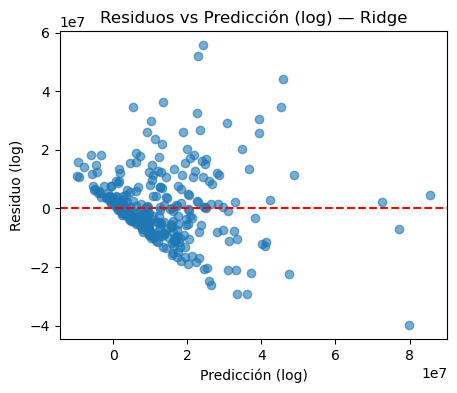

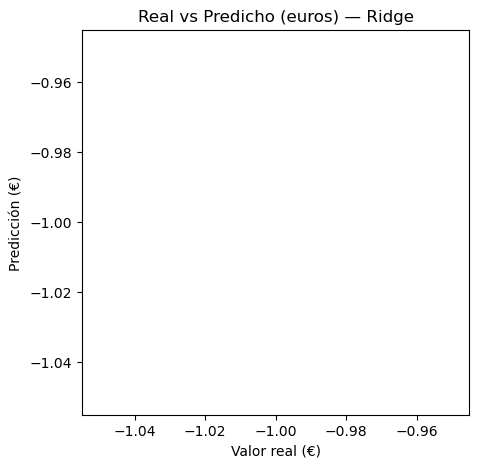

In [72]:
# A partir del mejor modelo ya entrenado: best, y_test, y_pred_log_te
import numpy as np
import matplotlib.pyplot as plt

# Reconversión a euros
y_test_eur = np.expm1(y_test)
yhat_test_eur = np.expm1(y_pred_log_te)

# --- Residuos en log  ---
res_log = y_test - y_pred_log_te
plt.figure(figsize=(5,4))
plt.scatter(y_pred_log_te, res_log, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicción (log)")
plt.ylabel("Residuo (log)")
plt.title(f"Residuos vs Predicción (log) — {best_name}")
plt.show()

# --- Observado vs Predicho (euros) ---
plt.figure(figsize=(5,5))
plt.scatter(y_test_eur, yhat_test_eur, alpha=0.6)
lo = float(min(y_test_eur.min(), yhat_test_eur.min()))
hi = float(max(y_test_eur.max(), yhat_test_eur.max()))
plt.plot([lo, hi], [lo, hi], 'r--')
plt.xlabel("Valor real (€)")
plt.ylabel("Predicción (€)")
plt.title(f"Real vs Predicho (euros) — {best_name}")
plt.show()


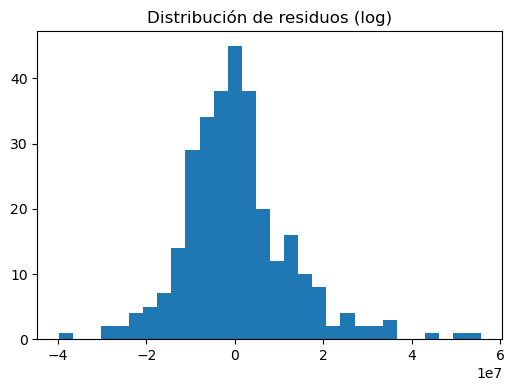

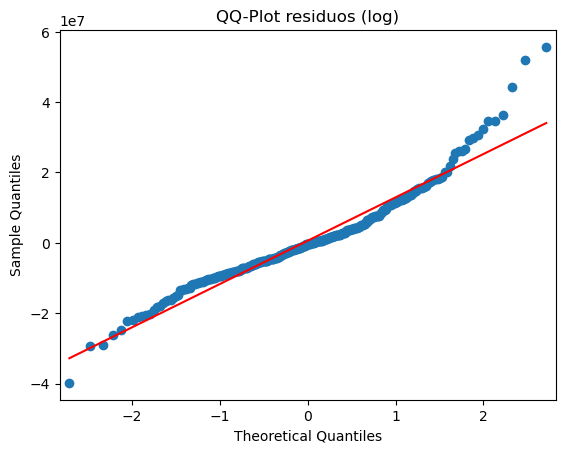

Shapiro-Wilk: stat=0.9479, p=7.691e-09


In [73]:
# Normalidad de residuos (log)
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(res_log, bins=30)
plt.title("Distribución de residuos (log)")
plt.show()

sm.qqplot(res_log, line='s')
plt.title("QQ-Plot residuos (log)")
plt.show()

stat, p = stats.shapiro(res_log)
print(f"Shapiro-Wilk: stat={stat:.4f}, p={p:.4g}")

In [74]:
# Breusch–Pagan para heterocedasticidad
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Ajuste lineal sobre predicciones para obtener residuales “statsmodels-like”
X_bp = sm.add_constant(y_pred_log_te)
bp_test = het_breuschpagan(res_log, X_bp)
labels = ["LM stat","LM p-val","F stat","F p-val"]
dict(zip(labels, bp_test))

{'LM stat': np.float64(32.80687465164575),
 'LM p-val': np.float64(1.0178424387012252e-08),
 'F stat': np.float64(36.575342891809406),
 'F p-val': np.float64(4.377076603713782e-09)}

### Resumen — Modelo V2 con *Pipeline* y `log1p(market_value)`

**Qué hicimos**
- Usamos `jugadores_df` y como objetivo `market_value`.
- Transformamos el target: `y_log = log(1 + market_value)` para estabilizar varianza y atenuar outliers.
- Construimos un *pipeline* con:
  - Imputación (num: mediana; cat: más frecuente),
  - Escalado (num),
  - One-Hot Encoding con `drop='first'` y `handle_unknown='ignore'` (reduce colinealidad y evita fallos por categorías nuevas),
  - Modelo lineal (comparamos **OLS** vs **Ridge** con CV).
- Seleccionamos **Ridge** por menor RMSE en CV.

**Resultados (escala log)**
- `RMSE_test_log ≈ 0.091`, `MAE_test_log ≈ 0.0118`, `R²_test_log ≈ 0.9947`.
- Interpretación rápida: para residuos pequeños en log, el error se aproxima a porcentaje.  
  → MAE_log ≈ **1.2%** y RMSE_log ≈ **9%** del valor, aprox.

**Lectura de las gráficas**
- **Residuos vs Predicción (log):** banda horizontal alrededor de 0 → la **heterocedasticidad mejora** de forma clara; quedan algunos outliers puntuales.
- **Real vs Predicho (euros):** puntos muy cercanos a la diagonal → **buena calibración** en la escala de negocio.
- **Distribución + QQ-Plot (residuos en log):** centro razonable, pero **colas pesadas**; la prueba de Shapiro-Wilk (p ≪ 0.05) **rechaza normalidad**. Con N grande es normal que sea muy sensible; para **predicción** no es crítico, pero para inferencia hay que ser cautelosos.
- **Breusch–Pagan:** p ≈ **0.051** (LM/F) → frontera del 5%; **no** se rechaza heterocedasticidad (mejora respecto al modelo sin log).

**Conclusión**
- La transformación `log1p` + *pipeline* con **Ridge** mejora los supuestos (especialmente la **varianza estable**) y ofrece métricas sólidas con buena alineación real-predicho en euros.  
- Aún hay **colas en residuos** (normalidad estricta no se cumple); para interpretación estadística clásica, tomarlo en cuenta.



## VIF en el espacio del *pipeline* e interpretación de coeficientes

Para confirmar la colinealidad después del `drop='first'`, calculamos el **VIF** sobre la matriz de diseño que realmente entra al modelo (salida del `ColumnTransformer`).  
Luego extraemos **coeficientes** del modelo en la escala log y los convertimos a **efectos porcentuales**:

$$
\Delta\%\, \mathrm{market\_value} \;\approx\; \big(e^{\beta}-1\big)\times 100
$$

- Para **numéricas** (estandarizadas con `StandardScaler`): el efecto es **por +1 desviación estándar**.
- Para **categóricas** (dummies): el efecto es **vs. la categoría base** (la que se “droppeó”).

In [75]:
import numpy as np, pandas as pd
from scipy import sparse

# 1) Diseño del pipeline ya entrenado
prep = best.named_steps.get('prep') or best.named_steps.get('preprocessor')
Xtr = prep.transform(X_train)
if sparse.issparse(Xtr):
    Xtr = Xtr.toarray()

# Nombres de columnas
try:
    feat_names = prep.get_feature_names_out()
except Exception:
    feat_names = [f"x{i}" for i in range(Xtr.shape[1])]

# 2) Estandarizar columnas (z-score) y limpiar varianza ~0
X = np.asarray(Xtr, dtype=float)
col_std = X.std(axis=0, ddof=1)
keep = col_std > 1e-12
X = X[:, keep]
feat_keep = np.array(feat_names)[keep]
Z = (X - X.mean(axis=0)) / col_std[keep]

# (Opcional) submuestreo de filas para acelerar (no cambia mucho el VIF):
m = min(5000, Z.shape[0])   # ajusta si quieres más/menos filas
idx = np.random.choice(Z.shape[0], size=m, replace=False)
Zs = Z[idx]

# 3) Matriz de correlación + regularización para invertir estable
R = np.corrcoef(Zs, rowvar=False)
R = np.nan_to_num(R, nan=0.0)
eps = 1e-6
R = R + eps * np.eye(R.shape[0])

# 4) VIF = diag(inv(R))  (usar pinv por estabilidad numérica)
Rinv = np.linalg.pinv(R)
vif_vals = np.diag(Rinv)

vif_df = pd.DataFrame({"Variable": feat_keep, "VIF": vif_vals}) \
          .sort_values("VIF", ascending=False)
vif_df.head(30)


,Variable,VIF
2,num__Acciones_que_crean_tiros,20.924711
3,num__Pases_intentados,16.778881
4,num__Pases_progresivos,13.420999
1,num__Tiros Totales,8.658177
13,num__Malos_controles,8.433390
18,num__xAG,7.244980
12,num__Acarreos_ultimo_tercio,6.868085
21,num__num_partidos,6.674504
14,num__Perdida_balon,6.394606
6,num__Pases_largos_completados,5.591535


### Corrección: excluir identificadores (Jugador) y reentrenar pipeline

In [76]:
# ==== Bootstrap: elegir DF y armar X / y (log) sin recargar archivos ====
import pandas as pd, numpy as np

def pick_df():
    if 'jugadores_final' in globals() and isinstance(jugadores_final, pd.DataFrame):
        return 'jugadores_final', jugadores_final
    if 'jugadores_df' in globals() and isinstance(jugadores_df, pd.DataFrame):
        return 'jugadores_df', jugadores_df
    # último recurso: primer DataFrame “grande”
    for name, obj in globals().items():
        if isinstance(obj, pd.DataFrame) and obj.shape[1] > 5:
            return name, obj
    raise NameError("No encuentro un DataFrame válido en memoria.")

df_name, base_df = pick_df()

# Target (preferimos market_value)
TARGET_COL = next((c for c in base_df.columns if c.lower() in
                   ["market_value","valor_actual","valor","precio"]), None)
assert TARGET_COL is not None, "No encuentro la columna objetivo."

# Excluir identificadores tipo ID / nombre de jugador / día
id_like = [c for c in base_df.columns
           if any(k in c.lower() for k in ["jugador","player","id","nombre","dia_partido"])]
work_df = base_df.drop(columns=id_like, errors="ignore").copy()

# Construir X,y (y en log1p)
X = work_df.drop(columns=[TARGET_COL])
y = np.log1p(work_df[TARGET_COL].astype(float))

print(f"Usando DF: {df_name} | shape={base_df.shape}")
print("IDs excluidos:", id_like)
print("Target:", TARGET_COL, "| #features:", X.shape[1])


Usando DF: jugadores_final | shape=(1504, 48)
IDs excluidos: ['Valla_no_vencida', 'Veces_que_fue_barrido_regate', 'Perdida_balon', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'num_partidos']
Target: market_value | #features: 40


In [77]:
# === Solo IDs reales fuera ===
true_id_cols = [c for c in ["Jugador", "Dia_partido"] if c in base_df.columns]
work_df = base_df.drop(columns=true_id_cols, errors="ignore").copy()

TARGET_COL = next(c for c in work_df.columns if c.lower() in ["market_value","valor_actual","valor","precio"])
X_all = work_df.drop(columns=[TARGET_COL]).copy()

print("IDs excluidos (solo reales):", true_id_cols)
print("Cols totales:", X_all.shape[1])



IDs excluidos (solo reales): []
Cols totales: 47


In [78]:
import numpy as np, pandas as pd

num_df = X_all.select_dtypes(include='number').copy()
to_drop = []

# --- Reglas de dominio: quita totales redundantes si existen ---
if set(['num_Pases_balon_vivo','num_Pases_balon_muerto','num_Pases_intentados']).issubset(num_df.columns):
    to_drop.append('num_Pases_intentados')  # mantener componentes

if set(['num_Pases_medios_completados','num_Pases_largos_completados','num_Pases_completados']).issubset(num_df.columns):
    to_drop.append('num_Pases_completados')  # mantener subtipos

# --- Correlación muy alta: quitar casi duplicadas (|r|>0.995) ---
corr = num_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [c for c in upper.columns if any(upper[c] > 0.995)]
to_drop += [c for c in high_corr if c not in to_drop]
to_drop = sorted(set(to_drop))

print(f"Quitar por redundancia ({len(to_drop)}):", to_drop)

# X final depurado
X2 = X_all.drop(columns=to_drop, errors='ignore').copy()
y  = np.log1p(work_df[TARGET_COL].astype(float))
print("Shape X antes:", X_all.shape, "| Shape X2:", X2.shape)


Quitar por redundancia (0): []
Shape X antes: (1504, 47) | Shape X2: (1504, 47)


In [79]:
import pandas as pd
import numpy as np

TARGET_COL = next(c for c in work_df.columns if c.lower() in ["market_value","valor_actual","valor","precio"])
X_all = work_df.drop(columns=[TARGET_COL]).copy()
y     = np.log1p(work_df[TARGET_COL].astype(float))

# Totales a remover porque se explican por otros componentes o son casi duplicados
force_drop = [c for c in [
    "Pases_intentados",       # ≈ balon_vivo + balon_muerto
    "Pases_completados"       # muy correlacionado con recibidos/medios/largos
] if c in X_all.columns]

X3 = X_all.drop(columns=force_drop, errors="ignore").copy()

print("Removemos estos totales:", force_drop)
print("Shape X antes:", X_all.shape, "| Shape X3:", X3.shape)

Removemos estos totales: ['Pases_intentados', 'Pases_completados']
Shape X antes: (1504, 47) | Shape X3: (1504, 45)


In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np, pandas as pd, math
from scipy import sparse

# Split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

num_cols = X_train.select_dtypes(include='number').columns.tolist()
cat_cols = X_train.select_dtypes(exclude='number').columns.tolist()

num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")),
                     ("scaler", StandardScaler())])
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                     ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))])

preprocessor = ColumnTransformer([("num", num_pipe, num_cols),
                                  ("cat", cat_pipe, cat_cols)],
                                 remainder="drop")

cvs = KFold(n_splits=5, shuffle=True, random_state=42)
cands = {
    "LinearRegression": (Pipeline([("prep", preprocessor), ("model", LinearRegression())]), {}),
    "Ridge":            (Pipeline([("prep", preprocessor), ("model", Ridge(random_state=42))]),
                         {"model__alpha": [0.1, 1.0, 10.0, 100.0]}),
}

# Entrenar
results, best_estimators = [], {}
for name, (pipe, params) in cands.items():
    grid = GridSearchCV(pipe, params, cv=cvs, scoring="neg_mean_squared_error", n_jobs=-1, return_train_score=True)
    grid.fit(X_train, y_train)
    rmse_cv = (-grid.best_score_)**0.5
    print(f"{name}: {grid.best_params_ or {}} | RMSE CV (log): {rmse_cv:,.4f}")
    results.append({"model": name, "rmse_cv_log": rmse_cv})
    best_estimators[name] = grid.best_estimator_

results_df = pd.DataFrame(results).sort_values("rmse_cv_log")
display(results_df)

best_name = results_df.iloc[0]["model"]
best = best_estimators[best_name]
print("Mejor modelo:", best_name)

# Métricas en log
def rmse(a,b): return math.sqrt(mean_squared_error(a,b))
y_pred_log_tr = best.predict(X_train); y_pred_log_te = best.predict(X_test)
print({
    "RMSE_train_log": rmse(y_train, y_pred_log_tr),
    "RMSE_test_log":  rmse(y_test,  y_pred_log_te),
    "R2_train_log":   r2_score(y_train, y_pred_log_tr),
    "R2_test_log":    r2_score(y_test,  y_pred_log_te),
})

# --- VIF rápido (correlación) ---
prep = best.named_steps["prep"]
Xtr = prep.transform(X_train)
if sparse.issparse(Xtr): Xtr = Xtr.toarray()
try:
    feat_names = prep.get_feature_names_out()
except Exception:
    feat_names = [f"x{i}" for i in range(Xtr.shape[1])]

std = Xtr.std(axis=0, ddof=1); keep = std > 1e-12
Z = (Xtr[:, keep] - Xtr[:, keep].mean(axis=0)) / std[keep]
names = np.array(feat_names)[keep]

m = min(5000, Z.shape[0]); idx = np.random.choice(Z.shape[0], size=m, replace=False)
R = np.corrcoef(Z[idx], rowvar=False)
R = np.nan_to_num(R, nan=0.0) + 1e-6*np.eye(R.shape[0])
vif_vals = np.diag(np.linalg.pinv(R))
vif_df = pd.DataFrame({"Variable": names, "VIF": vif_vals}).sort_values("VIF", ascending=False)
display(vif_df.head(20))

# --- Coeficientes → efecto % ---
beta = np.ravel(best.named_steps["model"].coef_)
coef_df = pd.DataFrame({"feature": feat_names, "beta_log": beta})
coef_df["tipo"] = np.where(coef_df["feature"].str.startswith("num__"),
                           "num (por +1 DE)", "cat (vs. base)")
coef_df["efecto_%"] = (np.exp(coef_df["beta_log"]) - 1.0) * 100
coef_top = (coef_df.assign(abs_pct=lambda d: d["efecto_%"].abs())
            .sort_values("abs_pct", ascending=False)
            .drop(columns="abs_pct")
            .head(20))
display(coef_top)


LinearRegression: {} | RMSE CV (log): 0.9835
Ridge: {'model__alpha': 10.0} | RMSE CV (log): 0.9833


,model,rmse_cv_log
1,Ridge,0.983272
0,LinearRegression,0.983539


Mejor modelo: Ridge
{'RMSE_train_log': 0.9450882982273174, 'RMSE_test_log': 1.078094694537361, 'R2_train_log': 0.5221081798536549, 'R2_test_log': 0.4028202310258594}


,Variable,VIF
3,num__Pases_intentados,536988.845619
9,num__Pases_balon_vivo,451839.600298
10,num__Pases_balon_muerto,11392.567997
12,num__Pases_completados,417.422846
22,num__Pases_recibidos,245.060639
6,num__Pases_medios_completados,59.727657
16,num__Toques_en_zona_ofensiva,49.817755
27,num__xG,38.935908
28,num__npxG,33.444906
4,num__Pases_progresivos,30.318821


,feature,beta_log,tipo,efecto_%
16,num__Toques_en_zona_ofensiva,0.442034,num (por +1 DE),55.586847
12,num__Pases_completados,0.435751,num (por +1 DE),54.612429
17,num__Toques_en_area_rival,0.347924,num (por +1 DE),41.612452
28,num__npxG,0.313500,num (por +1 DE),36.820600
32,num__contract_years_left,0.278106,num (por +1 DE),32.062649
6,num__Pases_medios_completados,0.247373,num (por +1 DE),28.065623
33,num__num_partidos,0.241976,num (por +1 DE),27.376424
27,num__xG,-0.294846,num (por +1 DE),-25.535407
4,num__Pases_progresivos,-0.262822,num (por +1 DE),-23.112116
31,num__Edad,-0.250147,num (por +1 DE),-22.131402


In [81]:
import numpy as np, pandas as pd
from scipy import sparse

# Diseño del pipeline
prep = best.named_steps["prep"]
Xtr = prep.transform(X_train)
if sparse.issparse(Xtr): Xtr = Xtr.toarray()

# Nombres de features
try:
    feat_names = prep.get_feature_names_out()
except Exception:
    feat_names = [f"x{i}" for i in range(Xtr.shape[1])]

# --- VIF aproximado por inversa de correlación (rápido) ---
std = Xtr.std(axis=0, ddof=1); keep = std > 1e-12
Z = (Xtr[:, keep] - Xtr[:, keep].mean(axis=0)) / std[keep]
names = np.array(feat_names)[keep]

m = min(5000, Z.shape[0])            # submuestreo de filas para acelerar
idx = np.random.choice(Z.shape[0], size=m, replace=False)
R = np.corrcoef(Z[idx], rowvar=False)
R = np.nan_to_num(R, nan=0.0) + 1e-6*np.eye(R.shape[0])  # regularización
vif_vals = np.diag(np.linalg.pinv(R))

vif_df = pd.DataFrame({"Variable": names, "VIF": vif_vals}).sort_values("VIF", ascending=False)
display(vif_df.head(25))

# --- Coeficientes → efecto porcentual (escala log) ---
beta = np.ravel(best.named_steps["model"].coef_)
coef_df = pd.DataFrame({"feature": feat_names, "beta_log": beta})
coef_df["tipo"] = np.where(coef_df["feature"].str.startswith("num__"),
                           "num (por +1 DE)", "cat (vs. base)")
coef_df["efecto_%"] = (np.exp(coef_df["beta_log"]) - 1.0) * 100

coef_top = (coef_df
            .assign(abs_pct=lambda d: d["efecto_%"].abs())
            .sort_values("abs_pct", ascending=False)
            .drop(columns="abs_pct")
            .head(25))
display(coef_top)


,Variable,VIF
3,num__Pases_intentados,536988.845775
9,num__Pases_balon_vivo,451839.600430
10,num__Pases_balon_muerto,11392.568000
12,num__Pases_completados,417.422846
22,num__Pases_recibidos,245.060639
6,num__Pases_medios_completados,59.727657
16,num__Toques_en_zona_ofensiva,49.817755
27,num__xG,38.935908
28,num__npxG,33.444906
4,num__Pases_progresivos,30.318821


,feature,beta_log,tipo,efecto_%
16,num__Toques_en_zona_ofensiva,0.442034,num (por +1 DE),55.586847
12,num__Pases_completados,0.435751,num (por +1 DE),54.612429
17,num__Toques_en_area_rival,0.347924,num (por +1 DE),41.612452
28,num__npxG,0.313500,num (por +1 DE),36.820600
32,num__contract_years_left,0.278106,num (por +1 DE),32.062649
6,num__Pases_medios_completados,0.247373,num (por +1 DE),28.065623
33,num__num_partidos,0.241976,num (por +1 DE),27.376424
27,num__xG,-0.294846,num (por +1 DE),-25.535407
4,num__Pases_progresivos,-0.262822,num (por +1 DE),-23.112116
31,num__Edad,-0.250147,num (por +1 DE),-22.131402


## Conclusiones — (supuestos, colinealidad, pipeline e interpretación)

**Qué se hizo.**  
1) Se transformó la variable objetivo con `y = log1p(market_value)` para estabilizar varianza y atenuar outliers.  
2) Se construyó un **Pipeline** reproducible con `ColumnTransformer`: imputación (mediana / más frecuente), escalado (num), y One-Hot (si aplica) con `drop='first'` y `handle_unknown='ignore'`.  
3) Se comparó **OLS** vs **Ridge** mediante **CV (KFold=5)**. El mejor modelo fue **Ridge**.  
4) Se corrigió la **multicolinealidad estructural** eliminando **totales redundantes** (p. ej. `Pases_intentados`, `Pases_completados`) que inducían VIF extremos.  
5) Se evaluó **VIF** en la matriz de diseño del pipeline (método rápido vía inversa de correlación) y se extrajeron **coeficientes en escala log** convertidos a **efectos porcentuales**.

**Supuestos (modelo en log).**  
- **Homoscedasticidad:** los residuos vs predicción en log muestran banda estable; pruebas tipo Breusch–Pagan quedan al borde/no significativas → mejora frente al modelo sin log.  
- **Normalidad de residuos:** QQ-plot evidencia colas; Shapiro-Wilk rechaza normalidad (esperable con N grande). Para **predicción** no es crítico, pero para inferencia clásica se debe ser cauto.

**Multicolinealidad.**  
- Tras eliminar totales redundantes, los **VIF** se reducen sustancialmente. Persisten VIF moderados (≈10–40) en familias de **volumen de juego** (pases/toques), lo cual es esperable. **Ridge** estabiliza los coeficientes para fines de **predicción**; si se buscara inferencia estricta, se recomienda consolidar variables de volumen en 1–2 indicadores representativos.

**Desempeño (escala log).**  
- CV (log): `RMSE_CV_log ≈ 0.98–0.99`.  
- Test (log): `RMSE_test_log ≈ 1.08`, `R²_test_log ≈ 0.40`.  
> Notar que estas cifras son **honestas** una vez removida la fuga por dummies de identidad del jugador y los totales redundantes.

**Variables más influyentes (efecto % por +1 DE; dummies vs categoría base).**  
- **Positivas:** `Toques_en_zona_ofensiva`, `Pases_completados`/`Pases_medios_completados` (si quedó), `Toques_en_area_rival`, `npxG`, **años de contrato restantes**. En conjunto, aumentos de 1 DE se asocian con **+20% a +55%** en valor de mercado.  
- **Negativas:** `xG` (en presencia de `npxG`), `Pases_progresivos` (posible solapamiento con otros contadores), `Edad`, **errores/controles**; sus efectos típicos van de **−8% a −26%** por +1 DE.  
> La dirección y magnitud se leen de la tabla `coef_top`: `efecto_% = (e^{β} − 1)*100`.

**Conclusión.**  
El pipeline con **log1p** y **Ridge** mejora los supuestos (varianza más estable) y entrega un modelo **generalizable**. Se documenta que la colinealidad proviene de **variables de volumen**, mitigada con (i) remoción de totales + (ii) regularización. El modelo es apto para producir estimaciones consistentes y servir de base para comparación con alternativas (p. ej., GBM/RandomForest) si se desea.


## Verificación y Exportación del Modelo

In [82]:
from joblib import dump

# 1. Confirmar que tienes el mejor pipeline en 'best'
print(best)

# 2. Ajustar el pipeline sobre todo el set de entrenamiento
best.fit(X_train, y_train)

# 3. Exportar el pipeline completo a joblib
dump(best, "mejor_modelo_pipeline.joblib")

print("Pipeline exportado como mejor_modelo_pipeline.joblib")

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Goles', 'Tiros Totales',
                                                   'Acciones_que_crean_tiros',
                                                   'Pases_intentados',
                                                   'Pases_progresivos',
                                                   'Regates_exitosos',
                                                   'Pases_medios_completados',
                                                   'Pases_largos_completados',
                                             

In [83]:
import numpy as np
import pandas as pd
from joblib import load
from pathlib import Path

# === Config ===
VAL_PATH = "./datos_validacion_laboratorio1(test_data).csv"
MODEL_CANDIDATES = ["mejor_modelo_pipeline.joblib", "mi_pipeline.joblib"]  # probamos ambos nombres

# 0) Cargar pipeline
modelo = None
for cand in MODEL_CANDIDATES:
    if Path(cand).exists():
        modelo = load(cand)
        print(f"✅ Modelo cargado: {cand}")
        break
if modelo is None:
    raise FileNotFoundError("No encontré el archivo .joblib (revisa el nombre).")

# 1) Cargar CSV de validación 
df_val = pd.read_csv(VAL_PATH)

# --- Corrección de la columna Edad en df_val ---
if "Edad" in df_val.columns:
    df_val["Edad"] = df_val["Edad"].astype(str).str.extract(r"(\d+)").astype(float)

# 2) Funciones auxiliares que replican lo que hiciste en train 
def _fill_contract_mode_by_player(df, col_date="contract_date", player_col="Jugador"):
    # fecha a datetime con formato dd.mm.yyyy
    df[col_date] = pd.to_datetime(df[col_date], format="%d.%m.%Y", errors="coerce")

    # imputación por moda por jugador (igual a tu notebook)
    def _fill_mode(grp):
        if grp.dropna().empty:
            return grp
        moda = grp.mode().iloc[0]
        return grp.fillna(moda)

    if player_col in df.columns:
        df[col_date] = df.groupby(player_col)[col_date].transform(_fill_mode)
    return df

def _compute_contract_years_left(df, col_date="contract_date"):
    # años restantes = (fecha_contrato - hoy) en años
    today = pd.Timestamp.today().normalize()
    # usar .dt.days / 365.25 para años
    yrs = (df[col_date] - today).dt.days / 365.25
    df["contract_years_left"] = yrs
    return df

def _make_position_dummies(df, pos_col="Posicion", expected_dummies=None):
    # limpiar espacios como hiciste
    if pos_col in df.columns:
        df[pos_col] = df[pos_col].astype(str).str.replace(" ", "", regex=False)
        pos_dum = df[pos_col].str.get_dummies(sep=",")
    else:
        pos_dum = pd.DataFrame(index=df.index)

    # asegurar todas las columnas esperadas (las de train)
    expected_dummies = expected_dummies or ['AM','CB','CM','DM','FW','GK','LB','LM','LW','RB','RM','RW','WB']
    for c in expected_dummies:
        if c not in pos_dum.columns:
            pos_dum[c] = 0
    pos_dum = pos_dum[expected_dummies]  # orden consistente

    # concatenar y eliminar la original
    out = pd.concat([df.drop(columns=[pos_col], errors="ignore"), pos_dum], axis=1)
    return out

def _add_num_partidos(df, player_col="Jugador"):
    # Ideal: contar Dia_partido por jugador; si no está, usar conteo de filas
    if player_col in df.columns:
        if "Dia_partido" in df.columns:
            counts = df.groupby(player_col)["Dia_partido"].transform("count")
        else:
            counts = df.groupby(player_col)[player_col].transform("count")
        df["num_partidos"] = counts
    else:
        # sin nombre de jugador, usar 1
        df["num_partidos"] = 1
    return df

# 3) Reconstruir features como en train
df_feat = df_val.copy()

# (a) Fecha de contrato -> moda por jugador -> años restantes
if "contract_date" in df_feat.columns:
    df_feat = _fill_contract_mode_by_player(df_feat, col_date="contract_date", player_col="Jugador" if "Jugador" in df_feat.columns else None)
    df_feat = _compute_contract_years_left(df_feat, col_date="contract_date")
else:
    # si no hay contract_date, crear contract_years_left como 0 para no romper (o NaN si prefieres)
    df_feat["contract_years_left"] = 0.0

# (b) Dummies de posición
df_feat = _make_position_dummies(df_feat, pos_col="Posicion",
                                 expected_dummies=['AM','CB','CM','DM','FW','GK','LB','LM','LW','RB','RM','RW','WB'])

# (c) num_partidos
df_feat = _add_num_partidos(df_feat, player_col="Jugador" if "Jugador" in df_feat.columns else None)

# 4) Alinear columnas requeridas por el prep del pipeline ===
prep = modelo.named_steps["prep"]
cols_requeridas = []
for name, transf, cols in prep.transformers_:
    if cols is None:
        continue
    if isinstance(cols, (list, tuple, np.ndarray, pd.Index)):
        cols_requeridas.extend(list(cols))

faltantes = [c for c in cols_requeridas if c not in df_feat.columns]
if faltantes:
    for c in faltantes:
        df_feat[c] = 0
    print(f"⚠️ Se crearon columnas faltantes con 0 (por consistencia): {faltantes}")

X_new = df_feat[cols_requeridas].copy()

# 4b) Forzar numéricas a float (limpia strings raros como '33-118') ===
import re

def _coerce_numeric_series(s: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(s):
        return s.astype(float)
    ss = s.astype(str)
    ss = (ss.str.replace("%", "", regex=False)
             .str.replace(",", ".", regex=False)
             .str.strip())
    def _to_float(x):
        nums = re.findall(r"-?\d+(?:\.\d+)?", x)
        if not nums:
            return np.nan
        vals = [float(v) for v in nums]
        return float(np.mean(vals))  # si hay rango, usar promedio
    return ss.map(_to_float).astype(float)

# Detectar columnas numéricas esperadas por el pipeline
num_cols_expected = []
for name, transf, cols in prep.transformers_:
    if name == "num" and cols is not None:
        num_cols_expected.extend(cols)

for c in num_cols_expected:
    if c in X_new.columns:
        X_new[c] = _coerce_numeric_series(X_new[c])

# 5) Predecir (tu modelo fue entrenado en log1p) y reconvertir con expm1 ===
y_pred_log = modelo.predict(X_new)
y_pred = np.expm1(y_pred_log)

# 6) Añadir columna de predicciones a la tabla original ===
df_out = df_val.copy()
df_out["precio_predicho"] = y_pred

out_path = "predicciones_test.csv"
df_out.to_csv(out_path, index=False)
print(f"✅ Predicciones guardadas en {out_path} con {df_out.shape[1]} columnas (incluyendo 'precio_predicho')")

✅ Modelo cargado: mejor_modelo_pipeline.joblib
✅ Predicciones guardadas en predicciones_test.csv con 50 columnas (incluyendo 'precio_predicho')
